# Messing with the data. One-hot encoding zipcode, dropping nan views, waterfront nans to zeroes for boolean, convert grade to log_grade,

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
# % get_backend()
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb_make = LabelEncoder()
gen_ohe = OneHotEncoder()

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
# 1. """df, df_val = df.train_test_split"""
# 2. """df.drop(["id", "date", "bedrooms", "sqft_lot","floors", 
#          "condition", "sqft_above", "yr_built", "yr_renovated", "sqft_lot15"], axis=1, inplace=True)
# 3."""

In [4]:
df.loc[df.bedrooms > 30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [5]:
df.drop(["id", "date", "bedrooms", "sqft_lot","floors", 
         "condition", "sqft_above", "yr_built", "yr_renovated", "sqft_lot15"], axis=1, inplace=True)


In [6]:
df["log_price"] = np.log(df.price)

In [7]:
df.drop(['price'], axis=1, inplace=True)

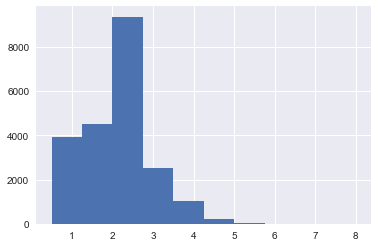

In [8]:
df.bathrooms.hist()

In [9]:
df.bathrooms.mean()

2.1158262721674306

In [10]:
df.bathrooms.median()

2.25

### Waterfront nans to zeros

In [11]:
df.waterfront = df.waterfront.fillna(0)

In [12]:
df.tail()

,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,zipcode,lat,long,sqft_living15,log_price
21592,2.50,1530,0.0,0.0,8,0.0,98103,47.6993,-122.346,1530,12.793859
21593,2.50,2310,0.0,0.0,8,0.0,98146,47.5107,-122.362,1830,12.899220
21594,0.75,1020,0.0,0.0,7,0.0,98144,47.5944,-122.299,1020,12.904459
21595,2.50,1600,0.0,0.0,8,0.0,98027,47.5345,-122.069,1410,12.899220
21596,0.75,1020,0.0,0.0,7,0.0,98144,47.5941,-122.299,1020,12.691580


In [13]:
df.isna().sum()

bathrooms         0
sqft_living       0
waterfront        0
view             63
grade             0
sqft_basement     0
zipcode           0
lat               0
long              0
sqft_living15     0
log_price         0
dtype: int64

In [14]:
df.view.isna().index 

RangeIndex(start=0, stop=21597, step=1)

In [15]:
df = df.dropna().copy()

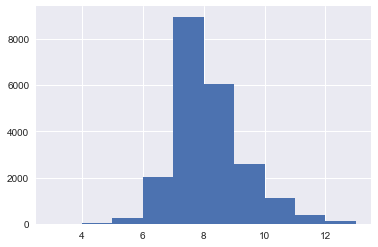

In [16]:
df.grade.hist()

In [17]:
df["log_grade"] = np.log(df.grade)

In [18]:
df.drop(["grade"], axis = 1, inplace = True )

In [19]:
sorted(df.sqft_basement.unique())[:18]

['0.0',
 '10.0',
 '100.0',
 '1000.0',
 '1008.0',
 '1010.0',
 '1020.0',
 '1024.0',
 '1030.0',
 '1040.0',
 '1050.0',
 '1060.0',
 '1070.0',
 '1080.0',
 '1090.0',
 '110.0',
 '1100.0',
 '1110.0']

In [20]:
df["sqft_basement"].replace("?", "0", inplace = True)

In [21]:
df.sqft_basement = df.sqft_basement.astype("float64")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 11 columns):
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
waterfront       21534 non-null float64
view             21534 non-null float64
sqft_basement    21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
log_price        21534 non-null float64
log_grade        21534 non-null float64
dtypes: float64(8), int64(3)
memory usage: 2.0 MB


In [23]:
sorted(df.sqft_basement.unique())[:8]

[0.0, 10.0, 20.0, 40.0, 50.0, 60.0, 65.0, 70.0]

In [24]:
#### Pin in Binning Sqft Basement for now

# Else drop

In [25]:
df.drop(['sqft_basement'], axis=1, inplace=True)

In [26]:
zip_dummies = pd.get_dummies(df.zipcode, prefix='zip_')

In [27]:
df.drop(['zipcode'], axis=1, inplace=True)

In [28]:
df = pd.concat((df, zip_dummies), axis=1)

In [29]:
df.columns

Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'lat', 'long',
       'sqft_living15', 'log_price', 'log_grade', 'zip__98001', 'zip__98002',
       'zip__98003', 'zip__98004', 'zip__98005', 'zip__98006', 'zip__98007',
       'zip__98008', 'zip__98010', 'zip__98011', 'zip__98014', 'zip__98019',
       'zip__98022', 'zip__98023', 'zip__98024', 'zip__98027', 'zip__98028',
       'zip__98029', 'zip__98030', 'zip__98031', 'zip__98032', 'zip__98033',
       'zip__98034', 'zip__98038', 'zip__98039', 'zip__98040', 'zip__98042',
       'zip__98045', 'zip__98052', 'zip__98053', 'zip__98055', 'zip__98056',
       'zip__98058', 'zip__98059', 'zip__98065', 'zip__98070', 'zip__98072',
       'zip__98074', 'zip__98075', 'zip__98077', 'zip__98092', 'zip__98102',
       'zip__98103', 'zip__98105', 'zip__98106', 'zip__98107', 'zip__98108',
       'zip__98109', 'zip__98112', 'zip__98115', 'zip__98116', 'zip__98117',
       'zip__98118', 'zip__98119', 'zip__98122', 'zip__98125', 'zip__98126',
   

In [30]:
%reload_ext autoreload
%autoreload 2

In [31]:
from haversine import distance_from_flatiron

In [32]:
df['coords'] = list(zip(round(df.lat, 6), round(df.long, 6)))

In [33]:
df['dist_flatiron'] = df.coords.apply(distance_from_flatiron)

In [34]:
df.drop(['lat', 'long', 'coords'], axis=1, inplace=True)

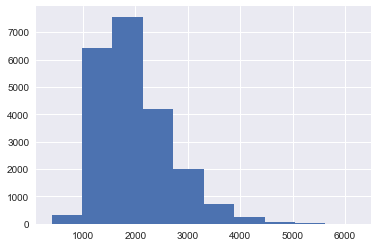

In [35]:
df.sqft_living15.hist()

In [36]:
df['log_sqft_liv15'] = np.log(df.sqft_living15)

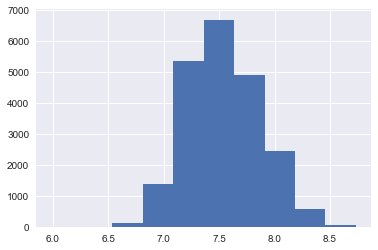

In [37]:
df.log_sqft_liv15.hist()

In [38]:
df.log_sqft_liv15.median()

7.517520850603031

In [39]:
df.log_sqft_liv15.mean()

7.539334924069345

In [40]:
df.drop(['sqft_living15'], axis=1, inplace=True)

In [41]:
df.columns

Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'log_price',
       'log_grade', 'zip__98001', 'zip__98002', 'zip__98003', 'zip__98004',
       'zip__98005', 'zip__98006', 'zip__98007', 'zip__98008', 'zip__98010',
       'zip__98011', 'zip__98014', 'zip__98019', 'zip__98022', 'zip__98023',
       'zip__98024', 'zip__98027', 'zip__98028', 'zip__98029', 'zip__98030',
       'zip__98031', 'zip__98032', 'zip__98033', 'zip__98034', 'zip__98038',
       'zip__98039', 'zip__98040', 'zip__98042', 'zip__98045', 'zip__98052',
       'zip__98053', 'zip__98055', 'zip__98056', 'zip__98058', 'zip__98059',
       'zip__98065', 'zip__98070', 'zip__98072', 'zip__98074', 'zip__98075',
       'zip__98077', 'zip__98092', 'zip__98102', 'zip__98103', 'zip__98105',
       'zip__98106', 'zip__98107', 'zip__98108', 'zip__98109', 'zip__98112',
       'zip__98115', 'zip__98116', 'zip__98117', 'zip__98118', 'zip__98119',
       'zip__98122', 'zip__98125', 'zip__98126', 'zip__98133', 'zip__98136',
       

In [42]:
from feat_to_model_eval import feat_to_model_kfold_eval

In [43]:
line, errs, rmse, mae = feat_to_model_kfold_eval(
    target='log_price', df=df, kvals=[5, 10, 20], 
    show_summary=True, price_logged=True, MAE=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1892.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:40:01   Log-Likelihood:                 5248.7
No. Observations:               21534   AIC:                        -1.034e+04
Df Residuals:                   21457   BIC:                            -9729.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.8052      0.049    198.622      0.000       9.708       9.902
bathrooms          0.0087      0.003      3.214      0.001       0.003       0.014
sqft_living        0.0002    2.8e-06     71.811      0.000       0.000       0.000
waterfront         0.4702      0.017     27.032      0.000       0.436       0.504
view               0.0623      0.002     30.972      0.000       0.058       0.066
log_grade          0.6506      0.015     44.436      0.000       0.622       0.679
zip__98001        -0.1612      0.014    -11.873      0.000      -0.188      -0.135
zip__98002        -0.1448      0.017     -8.756      0.000      -0.177      -0.112
zip__98003        -0.1661      0.014    -11.703      0.000      -0.194      -0.138
zip__98004         0.6808      0.012     56.610      0.000       0.657       0.704
zip__98005         0.3491      0.015     23.142      0.000       0.320       0.379
zip__98006         0.2601      0.009     28.790      0.000       0.242       0.278
zip__98007         0.2771      0.016     17.231      0.000       0.246       0.309
zip__98008         0.2936      0.011     25.900      0.000       0.271       0.316
zip__98010         0.2020      0.023      8.866      0.000       0.157       0.247
zip__98011         0.0987      0.014      7.250      0.000       0.072       0.125
zip__98014         0.2280      0.020     11.245      0.000       0.188       0.268
zip__98019         0.1388      0.016      8.738      0.000       0.108       0.170
zip__98022         0.1419      0.023      6.088      0.000       0.096       0.188
zip__98023        -0.2024      0.012    -16.217      0.000      -0.227      -0.178
zip__98024         0.3182      0.023     13.956      0.000       0.273       0.363
zip__98027         0.2349      0.010     23.249      0.000       0.215       0.255
zip__98028         0.0538      0.011      4.745      0.000       0.032       0.076
zip__98029         0.3186      0.011     27.708      0.000       0.296       0.341
zip__98030        -0.1715      0.013    -12.809      0.000      -0.198      -0.145
zip__98031        -0.1839      0.012    -15.077      0.000      -0.208      -0.160
zip__98032        -0.2685      0.018    -15.274      0.000      -0.303      -0.234
zip__98033         0.3909      0.010     40.317      0.000       0.372       0.410
zip__98034         0.1640      0.008     19.547      0.000       0.148       0.180
zip__98038         0.0169      0.013      1.320      0.187      -0.008       0.042
zip__98039         0.8210      0.027     29.875      0.000       0.767       0.875
zip__98040         0.4487      0.013     35.436      0.000       0.424       0.474
zip__98042        -0.1115      0.011     -9.727      0.000      -0.134      -0.089
zip__98045         0.3188      0.021     15.306      0.000       0.278       0.360
zip__98052  

Line: [ 9.80522280e+00  8.68086139e-03  2.00778131e-04  4.70194310e-01
  6.22653986e-02  6.50571523e-01 -1.61209153e-01 -1.44787294e-01
 -1.66092253e-01  6.80780705e-01  3.49118473e-01  2.60145282e-01
  2.77093039e-01  2.93642451e-01  2.02028282e-01  9.87330060e-02
  2.27993739e-01  1.38786035e-01  1.41872916e-01 -2.02373128e-01
  3.18151735e-01  2.34889386e-01  5.37802368e-02  3.18570056e-01
 -1.71451822e-01 -1.83917236e-01 -2.68501272e-01  3.90934861e-01
  1.64047224e-01  1.69009062e-02  8.21022828e-01  4.48689058e-01
 -1.11472343e-01  3.18798833e-01  2.85313529e-01  3.19811544e-01
 -1.88620448e-01 -3.31927841e-02 -1.13425902e-01  1.74386324e-02
  2.42594682e-01  1.28102981e-01  1.98160271e-01  2.44967197e-01
  2.75019618e-01  2.26579484e-01 -1.00362175e-01  4.12098741e-01
  3.42031846e-01  4.70057086e-01 -1.24892766e-01  3.53874762e-01
 -1.22674087e-01  4.63880345e-01  5.27519487e-01  3.57664216e-01
  2.69567848e-01  3.59595858e-01 -4.69728144e-03  4.54879272e-01
  2.69904398e-01  1

In [44]:
errs[:50]

array([-2.30768327e+04,  3.05886994e+04, -1.24019535e+05,  1.31026866e+05,
        4.39244311e+04, -3.42854479e+05, -5.37051877e+03, -1.09103880e+05,
       -1.24152725e+01, -1.36994049e+05,  6.68120255e+03, -3.54737563e+04,
        2.07470752e+04, -5.20040051e+03, -1.91518405e+05,  3.18409504e+04,
       -4.75833426e+04, -1.39521481e+04,  1.17358031e+04,  5.32777929e+03,
        6.09330433e+05, -5.65923383e+04,  4.63419151e+04, -1.75220255e+04,
        2.94917602e+04,  1.27518206e+05, -6.03878818e+04, -7.31775190e+04,
        7.90473448e+04,  1.36524328e+04, -5.55605862e+04,  7.89326413e+04,
        2.06105757e+04,  1.32062849e+03,  2.22145078e+04,  1.60615130e+05,
       -5.31086594e+04,  2.32349621e+04,  1.00196909e+05, -1.06122991e+04,
        1.20064304e+05, -2.72273261e+04,  8.39895068e+04,  7.64808997e+04,
       -8.04221282e+04,  3.86813428e+04,  9.03060561e+04,  2.34462782e+02,
        3.09076811e+05, -9.06862608e+03])

In [45]:
#SURPRISED BY COEFFICICIENT FOR DISTANCE TO FLATIRON!!!!

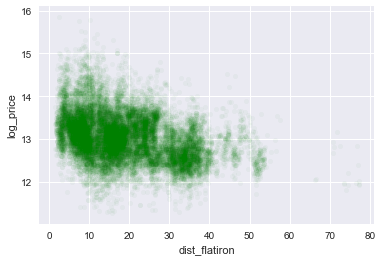

In [46]:
df.plot.scatter('dist_flatiron', 'log_price', c='green', alpha =.03)

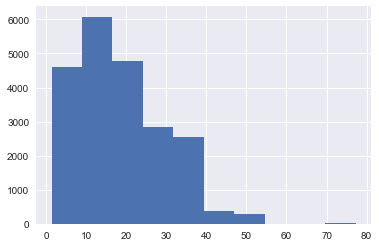

In [47]:
df.dist_flatiron.hist()

In [48]:
df.dist_flatiron.median()

16.65022501794016

In [49]:
df.dist_flatiron.mean()

18.62088577196373

In [50]:
#LETS DROP IT AND TRY AGAIN OR MAYBE LOG IT AND TRY

In [51]:
try_sans_dist = df.drop(['dist_flatiron'], axis=1).copy()

In [52]:
line, errs, rmse, mae = feat_to_model_kfold_eval(
    target='log_price', df=try_sans_dist, kvals=[5, 10, 20], 
    show_summary=True, price_logged=True, MAE=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1883.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:40:03   Log-Likelihood:                 5077.7
No. Observations:               21534   AIC:                        -1.000e+04
Df Residuals:                   21458   BIC:                            -9397.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.5653      0.048    199.205      0.000       9.471       9.659
bathrooms          0.0089      0.003      3.262      0.001       0.004       0.014
sqft_living        0.0002   2.82e-06     70.839      0.000       0.000       0.000
waterfront         0.4705      0.018     26.837      0.000       0.436       0.505
view               0.0625      0.002     30.842      0.000       0.059       0.066
log_grade          0.6556      0.015     44.434      0.000       0.627       0.685
zip__98001        -0.3311      0.010    -32.797      0.000      -0.351      -0.311
zip__98002        -0.3243      0.014    -24.007      0.000      -0.351      -0.298
zip__98003        -0.3249      0.011    -28.486      0.000      -0.347      -0.303
zip__98004         0.7765      0.011     70.938      0.000       0.755       0.798
zip__98005         0.4131      0.015     27.912      0.000       0.384       0.442
zip__98006         0.2960      0.009     33.274      0.000       0.279       0.313
zip__98007         0.3214      0.016     20.053      0.000       0.290       0.353
zip__98008         0.3165      0.011     27.858      0.000       0.294       0.339
zip__98010        -0.0364      0.019     -1.919      0.055      -0.074       0.001
zip__98011         0.0941      0.014      6.857      0.000       0.067       0.121
zip__98014         0.0202      0.017      1.188      0.235      -0.013       0.054
zip__98019        -0.0091      0.014     -0.659      0.510      -0.036       0.018
zip__98022        -0.2235      0.013    -17.831      0.000      -0.248      -0.199
zip__98023        -0.3701      0.009    -42.741      0.000      -0.387      -0.353
zip__98024         0.1601      0.021      7.512      0.000       0.118       0.202
zip__98027         0.1719      0.010     17.922      0.000       0.153       0.191
zip__98028         0.0667      0.011      5.849      0.000       0.044       0.089
zip__98029         0.2421      0.011     22.380      0.000       0.221       0.263
zip__98030        -0.2871      0.012    -24.051      0.000      -0.310      -0.264
zip__98031        -0.2604      0.012    -22.500      0.000      -0.283      -0.238
zip__98032        -0.3582      0.017    -21.029      0.000      -0.392      -0.325
zip__98033         0.4470      0.009     48.144      0.000       0.429       0.465
zip__98034         0.1977      0.008     23.943      0.000       0.182       0.214
zip__98038        -0.1682      0.008    -20.852      0.000      -0.184      -0.152
zip__98039         0.9406      0.027     34.931      0.000       0.888       0.993
zip__98040         0.5433      0.012     46.519      0.000       0.520       0.566
zip__98042        -0.2597      0.008    -31.384      0.000      -0.276      -0.243
zip__98045         0.0132      0.013      1.027      0.304      -0.012       0.038
zip__98052  

Line: [ 9.56529944e+00  8.88244358e-03  1.99581859e-04  4.70527703e-01
  6.24959465e-02  6.55602289e-01 -3.31112620e-01 -3.24296386e-01
 -3.24870717e-01  7.76509388e-01  4.13148779e-01  2.96018114e-01
  3.21420531e-01  3.16462555e-01 -3.63735268e-02  9.41071225e-02
  2.02238736e-02 -9.11476999e-03 -2.23454156e-01 -3.70109805e-01
  1.60073540e-01  1.71863247e-01  6.66938650e-02  2.42071469e-01
 -2.87077040e-01 -2.60357595e-01 -3.58196145e-01  4.47026661e-01
  1.97729682e-01 -1.68229578e-01  9.40571988e-01  5.43308566e-01
 -2.59678211e-01  1.31758390e-02  2.89799018e-01  2.49860782e-01
 -1.99054143e-01 -4.13888515e-03 -1.64486418e-01  4.70985982e-03
  4.11369184e-02  7.24120522e-02  1.60944391e-01  2.07530482e-01
  2.17872431e-01  1.48357137e-01 -3.02351273e-01  5.86546157e-01
  4.69276976e-01  6.00755819e-01 -9.06645365e-03  4.81709948e-01
  7.07341298e-03  6.35965706e-01  6.95337895e-01  4.68284861e-01
  4.12023548e-01  4.67055720e-01  1.07573827e-01  6.18374229e-01
  4.47912641e-01  2

In [53]:
#WORRRSSEEE LETS KEEP IT IN

In [54]:
df['log_dist_flatiron'] = np.log(df.dist_flatiron)

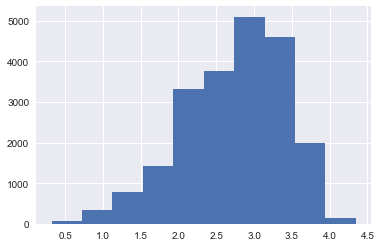

In [55]:
df.log_dist_flatiron.hist()

In [56]:
df.log_dist_flatiron.median()

2.812423730926132

In [57]:
df.log_dist_flatiron.mean()

2.730541133639437

In [58]:
df_temp = df.drop(['dist_flatiron'], axis=1).copy()

In [59]:
line, errs, rmse, mae = feat_to_model_kfold_eval(
    target='log_price', df=df_temp, kvals=[5, 10, 20], 
    show_summary=True, price_logged=True, MAE=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1903.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:40:05   Log-Likelihood:                 5300.4
No. Observations:               21534   AIC:                        -1.045e+04
Df Residuals:                   21457   BIC:                            -9833.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.1398      0.055    185.300      0.000      10.033      10.247
bathrooms             0.0075      0.003      2.791      0.005       0.002       0.013
sqft_living           0.0002   2.79e-06     72.325      0.000       0.000       0.000
waterfront            0.4722      0.017     27.215      0.000       0.438       0.506
view                  0.0615      0.002     30.636      0.000       0.058       0.065
log_grade             0.6460      0.015     44.219      0.000       0.617       0.675
zip__98001           -0.1536      0.013    -11.781      0.000      -0.179      -0.128
zip__98002           -0.1405      0.016     -8.812      0.000      -0.172      -0.109
zip__98003           -0.1535      0.014    -11.056      0.000      -0.181      -0.126
zip__98004            0.6949      0.011     60.427      0.000       0.672       0.717
zip__98005            0.3849      0.015     26.163      0.000       0.356       0.414
zip__98006            0.3047      0.009     34.573      0.000       0.287       0.322
zip__98007            0.3216      0.016     20.270      0.000       0.290       0.353
zip__98008            0.3432      0.011     30.333      0.000       0.321       0.365
zip__98010            0.1767      0.021      8.298      0.000       0.135       0.218
zip__98011            0.1489      0.014     10.768      0.000       0.122       0.176
zip__98014            0.2092      0.019     10.971      0.000       0.172       0.247
zip__98019            0.1550      0.016      9.847      0.000       0.124       0.186
zip__98022            0.0440      0.018      2.484      0.013       0.009       0.079
zip__98023           -0.1930      0.012    -16.123      0.000      -0.217      -0.170
zip__98024            0.3309      0.023     14.654      0.000       0.287       0.375
zip__98027            0.2766      0.011     25.846      0.000       0.256       0.298
zip__98028            0.1036      0.011      9.076      0.000       0.081       0.126
zip__98029            0.3603      0.012     29.843      0.000       0.337       0.384
zip__98030           -0.1418      0.014    -10.384      0.000      -0.169      -0.115
zip__98031           -0.1426      0.013    -11.200      0.000      -0.168      -0.118
zip__98032           -0.2304      0.018    -12.866      0.000      -0.265      -0.195
zip__98033            0.4305      0.009     46.680      0.000       0.412       0.449
zip__98034            0.2109      0.008     25.727      0.000       0.195       0.227
zip__98038            0.0181      0.012      1.526      0.127      -0.005       0.041
zip__98039            0.8082      0.027     29.525      0.000       0.755       0.862
zip__98040            0.4617      0.012     37.896      0.000       0.438       0.486
zip__98042           -0.0946      0.011     -8.371      0.000      -0.117

Line: [ 1.01398177e+01  7.52396695e-03  2.01821164e-04  4.72245101e-01
  6.14587025e-02  6.46042382e-01 -1.53636148e-01 -1.40464727e-01
 -1.53539814e-01  6.94865214e-01  3.84876975e-01  3.04748814e-01
  3.21557699e-01  3.43181770e-01  1.76664553e-01  1.48897885e-01
  2.09239180e-01  1.54978683e-01  4.39647986e-02 -1.93035466e-01
  3.30885236e-01  2.76600564e-01  1.03639510e-01  3.60305378e-01
 -1.41839244e-01 -1.42588960e-01 -2.30383801e-01  4.30525910e-01
  2.10889713e-01  1.81373880e-02  8.08205744e-01  4.61733536e-01
 -9.46329663e-02  2.56981644e-01  3.34884595e-01  3.61603091e-01
 -1.38252865e-01  1.47155899e-02 -6.72152672e-02  6.67216457e-02
  2.35545023e-01  1.71060170e-01  2.46026053e-01  2.93005351e-01
  3.18334915e-01  2.65870064e-01 -1.07406006e-01  2.43845993e-01
  3.15827891e-01  4.41511698e-01 -1.30813385e-01  3.32268801e-01
 -1.49784769e-01  3.12056715e-01  3.93893290e-01  3.59020497e-01
  2.18762635e-01  3.65549267e-01 -7.36398581e-03  3.41458290e-01
  8.83898094e-02  1

In [60]:
#SLIGHTLY IMPROVVEEEDD

In [61]:
#Maybe log bathrooms?

In [62]:
df['log_bathtrooms'] = np.log(df.bathrooms)

In [63]:
try_bath_log = df.drop(['bathrooms'], axis=1).copy()

In [64]:
line, errs, rmse, mae = feat_to_model_kfold_eval(
    target='log_price', df=try_bath_log, kvals=[5, 10, 20], 
    show_summary=True, price_logged=True, MAE=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1881.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:40:06   Log-Likelihood:                 5316.4
No. Observations:               21534   AIC:                        -1.048e+04
Df Residuals:                   21456   BIC:                            -9854.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.1246      0.056    179.314      0.000      10.014      10.235
sqft_living           0.0002   2.64e-06     75.667      0.000       0.000       0.000
waterfront            0.4725      0.017     27.248      0.000       0.439       0.507
view                  0.0619      0.002     30.861      0.000       0.058       0.066
log_grade             0.6364      0.015     43.313      0.000       0.608       0.665
zip__98001           -0.1395      0.014    -10.192      0.000      -0.166      -0.113
zip__98002           -0.1247      0.017     -7.514      0.000      -0.157      -0.092
zip__98003           -0.1413      0.014     -9.854      0.000      -0.169      -0.113
zip__98004            0.6848      0.012     57.086      0.000       0.661       0.708
zip__98005            0.3721      0.015     24.506      0.000       0.342       0.402
zip__98006            0.2935      0.009     30.895      0.000       0.275       0.312
zip__98007            0.3085      0.016     18.934      0.000       0.277       0.340
zip__98008            0.3308      0.012     27.968      0.000       0.308       0.354
zip__98010            0.2048      0.023      9.014      0.000       0.160       0.249
zip__98011            0.1384      0.014      9.821      0.000       0.111       0.166
zip__98014            0.2333      0.020     11.538      0.000       0.194       0.273
zip__98019            0.1646      0.016     10.269      0.000       0.133       0.196
zip__98022            0.0982      0.024      4.163      0.000       0.052       0.144
zip__98023           -0.1792      0.013    -14.194      0.000      -0.204      -0.154
zip__98024            0.3446      0.023     15.081      0.000       0.300       0.389
zip__98027            0.2740      0.011     25.577      0.000       0.253       0.295
zip__98028            0.0921      0.012      7.766      0.000       0.069       0.115
zip__98029            0.3579      0.012     29.668      0.000       0.334       0.382
zip__98030           -0.1381      0.014    -10.058      0.000      -0.165      -0.111
zip__98031           -0.1450      0.013    -11.394      0.000      -0.170      -0.120
zip__98032           -0.2284      0.018    -12.760      0.000      -0.263      -0.193
zip__98033            0.4176      0.010     41.871      0.000       0.398       0.437
zip__98034            0.1977      0.009     22.080      0.000       0.180       0.215
zip__98038            0.0335      0.013      2.603      0.009       0.008       0.059
zip__98039            0.8034      0.027     29.233      0.000       0.750       0.857
zip__98040            0.4516      0.013     35.763      0.000       0.427       0.476
zip__98042           -0.0848      0.012     -7.245      0.000      -0.108      -0.062
zip__98045            0.2982      0.021     14.302      0.000       0.257

Line: [ 1.01246465e+01  2.00056886e-04  4.72511729e-01  6.19186173e-02
  6.36422173e-01 -1.39541001e-01 -1.24670684e-01 -1.41286115e-01
  6.84826692e-01  3.72125737e-01  2.93475152e-01  3.08525835e-01
  3.30817207e-01  2.04754661e-01  1.38412960e-01  2.33275331e-01
  1.64598897e-01  9.81921603e-02 -1.79227687e-01  3.44551332e-01
  2.74022159e-01  9.20900640e-02  3.57861281e-01 -1.38069547e-01
 -1.45008617e-01 -2.28361293e-01  4.17592796e-01  1.97719826e-01
  3.35162098e-02  8.03387144e-01  4.51584847e-01 -8.48099330e-02
  2.98240614e-01  3.24132046e-01  3.59831588e-01 -1.47350662e-01
  2.47812389e-03 -7.19210890e-02  5.77444932e-02  2.55273121e-01
  1.68040052e-01  2.40208064e-01  2.87201353e-01  3.15788016e-01
  2.66934623e-01 -8.73774296e-02  2.62383517e-01  3.09674347e-01
  4.35551648e-01 -1.40268235e-01  3.24198948e-01 -1.56467462e-01
  3.27566843e-01  4.06661006e-01  3.49376916e-01  2.16073379e-01
  3.55226586e-01 -1.60192927e-02  3.49475473e-01  1.08690132e-01
  1.66368839e-01  6

In [65]:
#COMPARABLE TO FIRST